<div style="width: 100%; clear: both;">
  <div style="float: left; width: 50%;">
    <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
  </div>
  <div style="float: right; width: 50%;">
    <p style="padding-top: 42px; text-align:right;">&nbsp;</p>
    <p style="padding-top: 42px; text-align:right;">M2.882 - TFM - Area 5 aula 1</p>
    <p style="margin: 0; text-align:right;">2021-1 · Máster universitario en Ciencia de datos (Data science)</p>
  </div>
   <div style="width:100%; clear: both;">&nbsp;</div>
</div>

# PEC3 - Design & implementation

## Sale of access IoT devices in underground forums

Autor: [Sergio Fernández García](mailto:serfer2@protonmail.com)

In [35]:
import os
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from psycopg2 import connect

from application.services import HackForumsThreadsExtraction
from infrastructure.repositories import (
    ForumDBRepository,
    ThreadSummaryDBRepository,
)
from shared.constants import RELATED_TERMS

DDOS_TECH_TERMS = RELATED_TERMS['tech_terms']

### Data source

Try to connect with environment variables, recommended for docker environment.

If no environment variables have been set, DB connection values can be hardcoded below:


In [5]:
dbc = connect(
    host=os.getenv('POSTGRES_HOST', 'localhost'),
    database=os.getenv('POSTGRES_DB', 'crimebb'),
    user=os.getenv('POSTGRES_USER', 'crimebb'),
    password=os.getenv('POSTGRES_PASSWORD', 'crimebbinlocalhost'),
)

### Data extraction

#### Extract HackForums DDoS related threads

Read threads heading and first post content from subforums in section `Market`.

Selected threads should contain almost one tech term related with DDoS.

**NOTES:**

* Analyzed thread content is formed by: Thread heading and first thread post (the one that starts thread).
* Dataset is big and filtering and preparing data **could take some time** (< 2min).


In [9]:
start = datetime.now()
data_extraction_service = HackForumsThreadsExtraction(
    forum_repository=ForumDBRepository(dbc=dbc),
    thread_summary_repository=ThreadSummaryDBRepository(dbc=dbc),
)
ddos_related_terms = RELATED_TERMS.get('tech_terms')
related_threads_data = data_extraction_service.extract(
    related_terms=ddos_related_terms,
)
end = datetime.now()

print(f'*** Related threads ... {len(related_threads_data)}')
print(f'*** Elapsed Time ...... {end - start}')

*** Related threads ... 40313
*** Elapsed Time ...... 0:01:15.538118


In [17]:
threads_df = pd.DataFrame(related_threads_data)
threads_df.head()

,content,tstamp,matching_terms,word_list
0,buying botnet im buying a good botnet with alo...,2008-02-18 08:37:00+00:00,[botnet],"[buying, botnet, im, a, good, with, alot, of, ..."
1,botnet with undetected server 4sale hey people...,2008-03-21 08:47:00+00:00,[botnet],"[botnet, with, undetected, server, 4sale, hey,..."
2,interested in purchasing a botnet im intereste...,2008-04-09 04:41:00+00:00,"[botnet, ddos]","[interested, in, purchasing, a, botnet, im, as..."
3,trojans/botnet source/keyloggers + packers/cry...,2008-04-15 07:57:00+00:00,[botnet],"[trojans, botnet, source, keyloggers, packers,..."
4,professional bulletproof hosting service from ...,2008-04-24 12:11:00+00:00,[botnet],"[professional, bulletproof, hosting, service, ..."


### Data Analysis

#### Terms appearances

Forum threads have been filtered by tech terms related with DDoS. Let's visualize most relevant terms according to the quantity of appearances 

[]

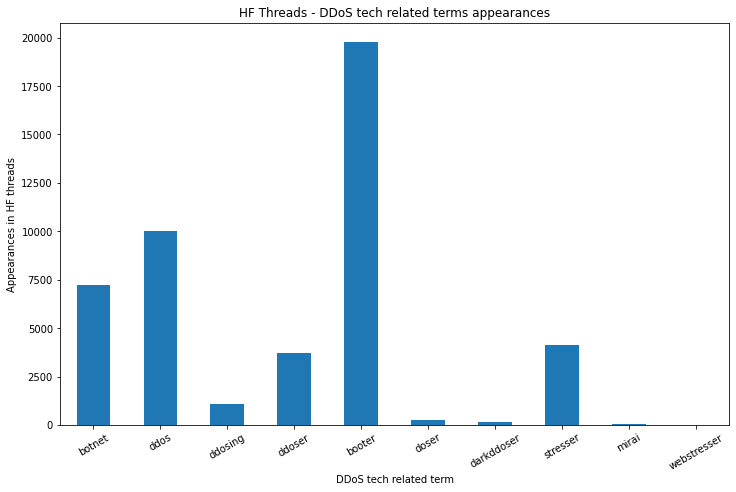

In [43]:
terms_count = dict()
for terms_list in threads_df['matching_terms'].values:
    for term in terms_list:
        if term not in terms_count:
            terms_count[term] = 0
        terms_count[term] += 1

#  plt.bar(terms_count.keys(), terms_count.values())
terms_count_df = pd.DataFrame(
    {'matches': terms_count.values()}, 
    index=terms_count.keys()
)
plt.rcParams['figure.figsize'] = (12, 7.4)
terms_count_df['matches'].plot(kind='bar')
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("HF Threads - DDoS tech related terms appearances")
plt.xlabel("DDoS tech related term")
plt.ylabel("Appearances in HF threads")
plt.plot()